## Importing the dependencies

In [643]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from collections import Counter

## Load the training data

In [644]:
train = pd.read_csv('./datasets/train.csv')
train.head()

,Date,Passengers
0,2008-01-01,112
1,2008-02-01,118
2,2008-03-01,132
3,2008-04-01,129
4,2008-05-01,121


## Convert the Date (time series) to days from now (integer)

In [645]:
train['Date'] = pd.to_datetime(train['Date'])
train['Days ago'] = (dt.now() - train['Date']).dt.days
train.head()

,Date,Passengers,Days ago
0,2008-01-01,112,5868
1,2008-02-01,118,5837
2,2008-03-01,132,5808
3,2008-04-01,129,5777
4,2008-05-01,121,5747


## Analyzing the data patterns

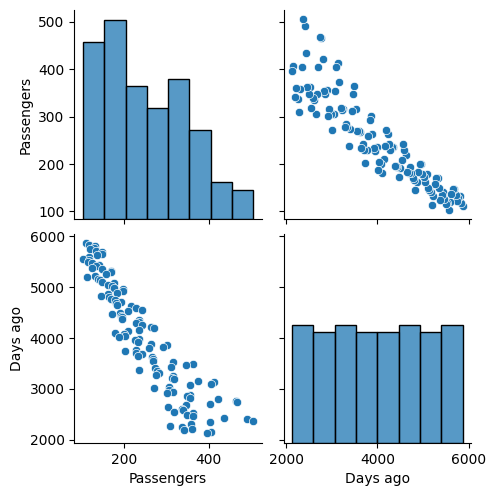

In [646]:
sns.pairplot(train)

In [647]:
X_train = np.asarray(train['Days ago'].values.tolist())
y_train = np.asarray(train['Passengers'].values.tolist())

## Creating the KNN model

In [648]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return np.mean(k_nearest_labels)

In [649]:
test = pd.read_csv('./datasets/test.csv')
test.head()

,Date
0,2018-05-01
1,2018-06-01
2,2018-07-01
3,2018-08-01
4,2018-09-01


In [650]:
test['Date'] = pd.to_datetime(test['Date'])
test['Days ago'] = (dt.now() - test['Date']).dt.days

In [651]:
X_test = np.asarray(test['Days ago'].values.tolist())
X_test

array([2095, 2064, 2034, 2003, 1972, 1942, 1911, 1881, 1850, 1819, 1791,
       1760, 1730, 1699, 1669, 1638, 1607, 1577, 1546, 1516])

In [652]:
model = KNN(10)
model.fit(X_train.reshape(-1, 1), y_train)

model.predict(X_test.reshape(-1, 1))

array([391., 391., 391., 391., 391., 391., 391., 391., 391., 391., 391.,
       391., 391., 391., 391., 391., 391., 391., 391., 391.])